In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Decision_Tree\\company_data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.describe();

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
## To convert object variable intp int64
df.iloc[:,6]=le.fit_transform(df.iloc[:,6])
df.iloc[:,9]=le.fit_transform(df.iloc[:,9])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])

In [11]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [12]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=10,contamination=0.02)
clf.fit(df)

IsolationForest(contamination=0.02, random_state=10)

In [13]:
y_preds_outliers=clf.predict(df)

In [14]:
df['scores']=clf.decision_function(df)

In [15]:
df['anomaly']=clf.predict(df.iloc[:,0:11])

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.106265,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.094003,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.132237,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.138284,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.107986,1


In [17]:
df[df['anomaly']==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
42,10.43,77,69,0,25,24,2,50,18,1,0,-0.021214,-1
57,0.91,93,91,0,22,117,0,75,11,1,0,-0.003241,-1
75,8.55,88,111,23,480,92,0,36,16,0,1,-0.020586,-1
106,0.16,102,33,0,217,139,2,70,18,0,0,-0.001391,-1
165,0.37,147,58,7,100,191,0,27,15,1,1,-0.018682,-1
174,0.00,139,24,0,358,185,2,79,15,0,0,-0.019984,-1
208,7.78,86,54,0,497,64,0,33,12,1,0,-0.003206,-1
367,14.37,95,106,0,256,53,1,52,17,1,0,-0.022120,-1


In [18]:
df1=df.drop(df.index[[5,42,75,165,174,208,284,310]],axis=0)


In [19]:
columns=df1.iloc[:,1:].columns
columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'scores', 'anomaly'],
      dtype='object')

In [20]:
df.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [21]:
df.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [22]:
df.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [23]:
from sklearn.preprocessing import Binarizer

In [24]:
bin=Binarizer(threshold=7.49)

In [25]:
col=df1['Sales'].values
col=col.reshape(-1,1)

In [26]:
col;

In [27]:
x=df1.iloc[:,1:]
y=bin.fit_transform(col)

<ipython-input-28-ee3ec0514c49>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


[0.10033319 0.08405922 0.09648737 0.07525293 0.19134474 0.14394056
 0.10765952 0.07000001 0.02675299 0.02337304 0.08009902 0.00069742]


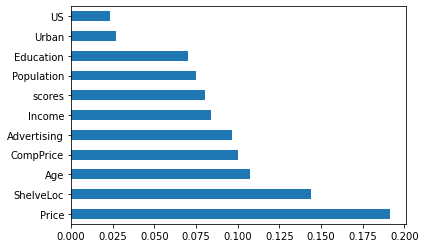

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [29]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.106265,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.094003,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.132237,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.138284,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.107986,1


In [52]:
df2=df1.drop(df1.columns[[9,10,11,12]],axis=1)

In [53]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,0,42,17
1,11.22,111,48,16,260,83,1,65,10
2,10.06,113,35,10,269,80,2,59,12
3,7.40,117,100,4,466,97,2,55,14
4,4.15,141,64,3,340,128,0,38,13


In [54]:
x1=df2.iloc[:,1:]

## Bagging Classifier

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
kfold=KFold(n_splits=4,random_state=None)
cart=DecisionTreeClassifier()
num_trees=100
model1=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=0)

results=cross_val_score(model1,x1,y,cv=kfold)
print(results.mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

0.8035714285714286


## RandomForest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
max_features=3
model2=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result=cross_val_score(model2,x1,y,cv=kfold)
print(result.mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

0.7984693877551021


## Adaboost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(n_estimators=num_trees,random_state=None)
result=cross_val_score(model3,x1,y,cv=kfold)
print(result.mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

0.798469387755102


## Stacking of Bagging, RandomForest and Adaboost

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [61]:
estimators = []
#model4 = LogisticRegression(max_iter=500)
estimators.append(('bagging', model1))
estimators.append(('RandomForest', model2))
estimators.append(('Adaboost', model3))
#estimators.append(('logistic', model4))
#model5 = DecisionTreeClassifier()
#estimators.append(('cart', model5))
#model6 = SVC()
#estimators.append(('svm', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x1, y, cv=kfold)
print(results.mean())


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

0.8010204081632654
